# packages

In [211]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install("pandas")
install("numpy")
install("matplotlib")

In [212]:
destination_folder = 'target/img/final/'

# imports

In [213]:
import pandas as pd
import numpy as np
import json
import csv
import os
import matplotlib.pyplot as plt

# Read data variable from csv

In [214]:
df = pd.read_csv(filepath_or_buffer="data/extraction consolidation results.csv", sep="|", encoding="latin-1")
result = df['Title'].to_list()
result = list(dict.fromkeys(result))
titles = list(df.columns)
metadata = pd.read_csv("./data/search_results.csv", sep=";", encoding="latin-1")
metadata = metadata.drop_duplicates(subset=['Title'])
data = df.merge(metadata, how='left', on='Title')
del metadata
del df
del titles

In [215]:
data.head()

,Title,DT Definition,virtual space,Kritzinger,DT is specific,modeling language original,note on modeling language,model type original,modeling language,model type,...,purpose /expected benefit of using models,open challenges,Technological Readiness Level,notes,Use Case,Publication Title,Authors,Publication Year,Document Identifier,Publisher
0,A framework for Model-Driven Engineering of re...,"dynamic virtual model of a system, processor, ...",Model of PT,NaN,NaN,SysML,NaN,structure,SysML,Structure,...,formal specification of information in the for...,NaN,TRL 1-3,NaN,limited traffic zone access control,Computing,Parri J.; Patara F.; Sampietro S.; Vicario E.,2021.0,Article,Springer
1,A framework for Model-Driven Engineering of re...,NaN,NaN,NaN,NaN,Knowledge base model,contribution of the paper,NaN,Knowledge base model,??,...,NaN,NaN,NaN,NaN,NaN,Computing,Parri J.; Patara F.; Sampietro S.; Vicario E.,2021.0,Article,Springer
2,A Methodology for Digital Twin Modeling and De...,"""The digital twin (DT) is a virtual representa...",Model of PT,NaN,NaN,AutomationML,NaN,structure,AutomationML,Structure,...,"model the physical device, serving as the virt...",NaN,TRL 1-3,NaN,refinery automationsystem with four valves,Proceedings of the IEEE,G. N. Schroeder; C. Steinmetz; R. N. Rodrigues...,2021.0,IEEE Journals,IEEE
3,A Methodology for Digital Twin Modeling and De...,NaN,NaN,NaN,NaN,NaN,NaN,structure,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Proceedings of the IEEE,G. N. Schroeder; C. Steinmetz; R. N. Rodrigues...,2021.0,IEEE Journals,IEEE
4,A Novel Methodology to Construct Digital Twin ...,"""a digital twin of a system consists of a set ...",Comprehensive,DS,NaN,Fault Tree,NaN,behavior,Fault Tree,Behavior,...,NaN,NaN,TRL 1-3,NaN,ground station of a spacecraft,Proceedings of the 25th International Conferen...,"Christofi N,Pucel X",2022.0,Conference Paper,ACM


# Data analysis

## What

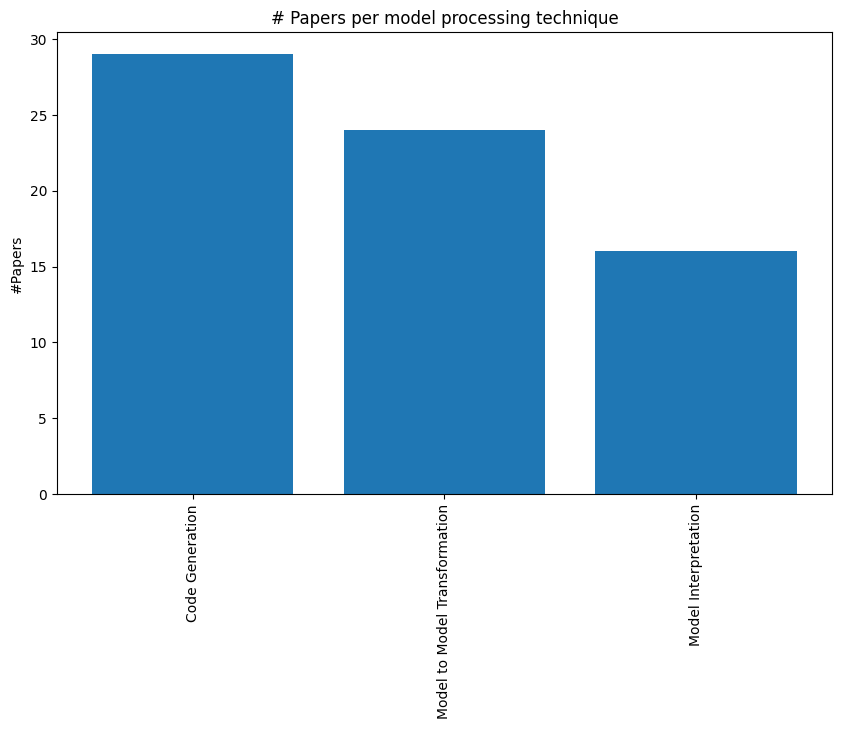

In [216]:
occurrences_df = data["model processing technique"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per model processing technique')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.show()

In [217]:
data["modeling language"].value_counts()

modeling language
SysML                                    9
UML Class Diagram                        5
MontiArc                                 4
BPMN                                     3
Unity 3D simulation model                2
AAS                                      2
AutomationML                             2
MontiThings                              1
Twin Process Model                       1
Data Model                               1
tagging language                         1
GUI DSL                                  1
OCL                                      1
City GML 3D city model                   1
undefined                                1
DTDL                                     1
OWL Ontology                             1
Simulink                                 1
OML Vocabulary                           1
Control Systems Model (M&CML)            1
OWL Individuals                          1
UML Activity Diagram                     1
MontiGem GUI Model                  

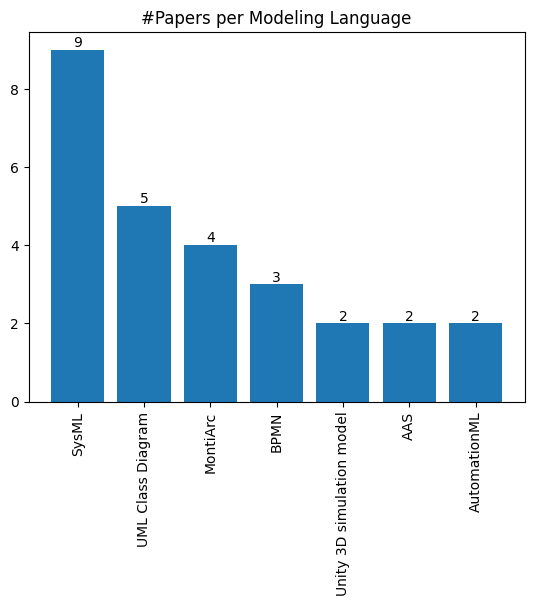

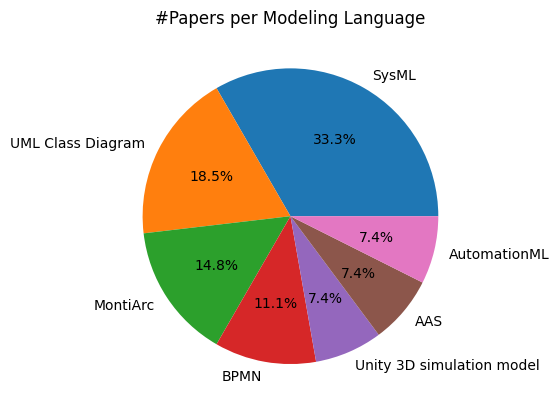

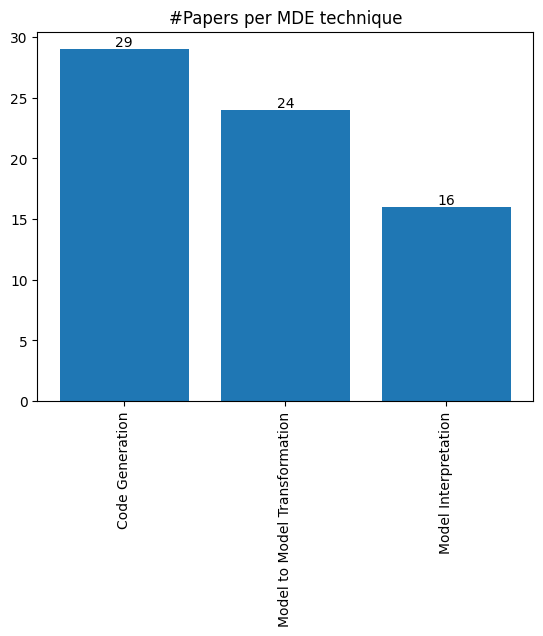

In [218]:
modeling_language = data["modeling language"].value_counts().reset_index()
modeling_language.columns = ['entry', 'count']
modeling_language  = modeling_language[modeling_language['count'] > 1]
mde_technique= data["model processing technique"].value_counts().reset_index()
mde_technique.columns = ['entry', 'count']
use_case_domain = data["use case domain"].value_counts().reset_index()
use_case_domain.columns = ['entry', 'count']
system_lcp = data["system lifecycle phase"].value_counts().reset_index()
system_lcp.columns = ['entry', 'count']
twinning_target = data["twinning target"].value_counts().reset_index()
twinning_target.columns = ['entry', 'count']
twin_lcp= data["twin lifecycle phase"].value_counts().reset_index()
twin_lcp.columns = ['entry', 'count']
trl = data["Technological Readiness Level"].value_counts().reset_index()
trl.columns = ['entry', 'count']

fig, axes = plt.subplots()

# List of DataFrames
dataframes = [modeling_language, mde_technique]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Modeling Language', '#Papers per MDE technique']

# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[0])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.savefig(destination_folder+"1.1 Papers per Modeling Language.jpg")

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[0]
#axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.pie(plot_data['count'], labels=plot_data['entry'], autopct='%1.1f%%')
axes.set_title(titles[0])
#axes.set_xticklabels(plot_data['entry'], rotation=90)
#axes.bar_label(axes.containers[0])
plt.savefig(destination_folder+"3.1 Papers per Modeling Language Percent.jpg")

fig, axes = plt.subplots()
# Loop through the subplots and plot each bar chart
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'], tick_label=plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[1])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])

# Adjust the layout to avoid overlapping titles

#plt.show()
plt.savefig(destination_folder+"1.2 Papers per MDE technique.jpg")



In [219]:
# List of DataFrames
dataframes = [use_case_domain, system_lcp, twinning_target, twin_lcp, trl]
# Titles for each subplot (modify as needed)
titles = ['#Papers per Use Case Domain', '#Papers per System LCP', '#Papers per Twinning Target', '#Papers per Twin LCP', '#Papers per TRL']


C:\Users\ac130903\AppData\Local\Temp\ipykernel_18988\1366343726.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=90)


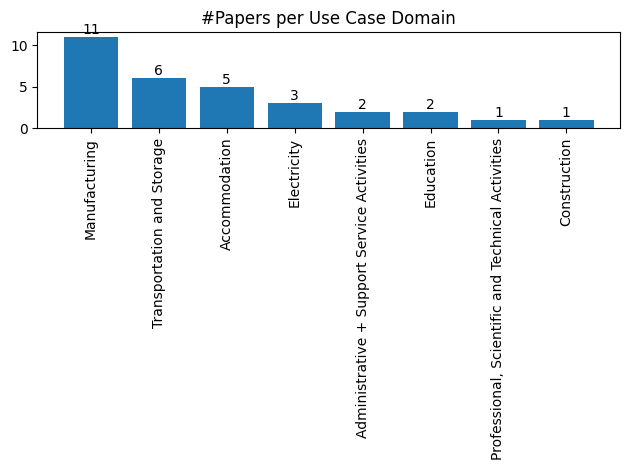

In [220]:
fig, axes = plt.subplots()
plot_data = dataframes[0]
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[0])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"3.2.1 Paper per use case domain.jpg")

C:\Users\ac130903\AppData\Local\Temp\ipykernel_18988\283142541.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=90)


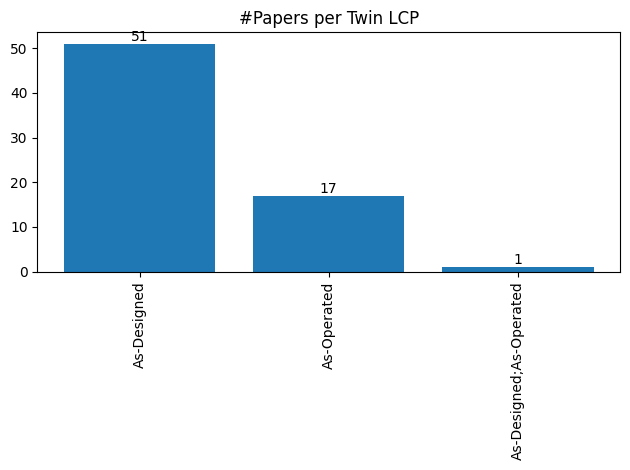

In [221]:
fig, axes = plt.subplots()
plot_data = dataframes[3]
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[3])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"3.2.1 Paper per TLCP.jpg")

C:\Users\ac130903\AppData\Local\Temp\ipykernel_18988\311928180.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(plot_data['entry'], rotation=90)


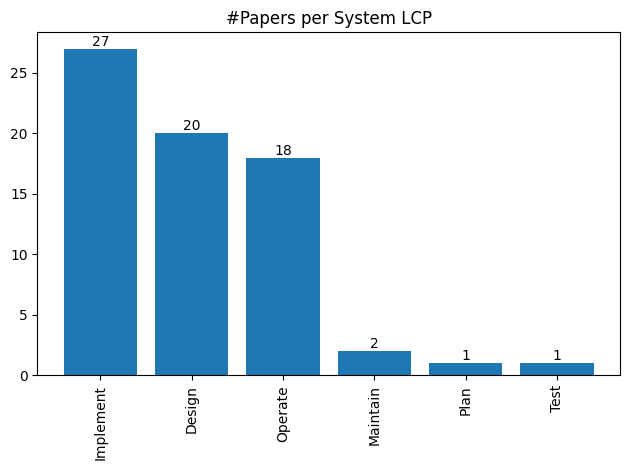

In [222]:
fig, axes = plt.subplots()
plot_data = dataframes[1]
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[1])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])
plt.tight_layout()
plt.savefig(destination_folder+"3.2.1 Paper per SLCP.jpg")

C:\Users\ac130903\AppData\Local\Temp\ipykernel_18988\1529088288.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][1].set_xticklabels(plot_data['entry'], rotation=90)
C:\Users\ac130903\AppData\Local\Temp\ipykernel_18988\1529088288.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][1].set_xticklabels(plot_data['entry'], rotation=90)
C:\Users\ac130903\AppData\Local\Temp\ipykernel_18988\1529088288.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_xticklabels(plot_data['entry'], rotation=90)
C:\Users\ac130903\AppData\Local\Temp\ipykernel_18988\1529088288.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_xticklabels(plot_data['entry'], rotation=90)
C:\Users\ac130903\AppData\Local\Temp\ipykernel_18988\1529088288.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels

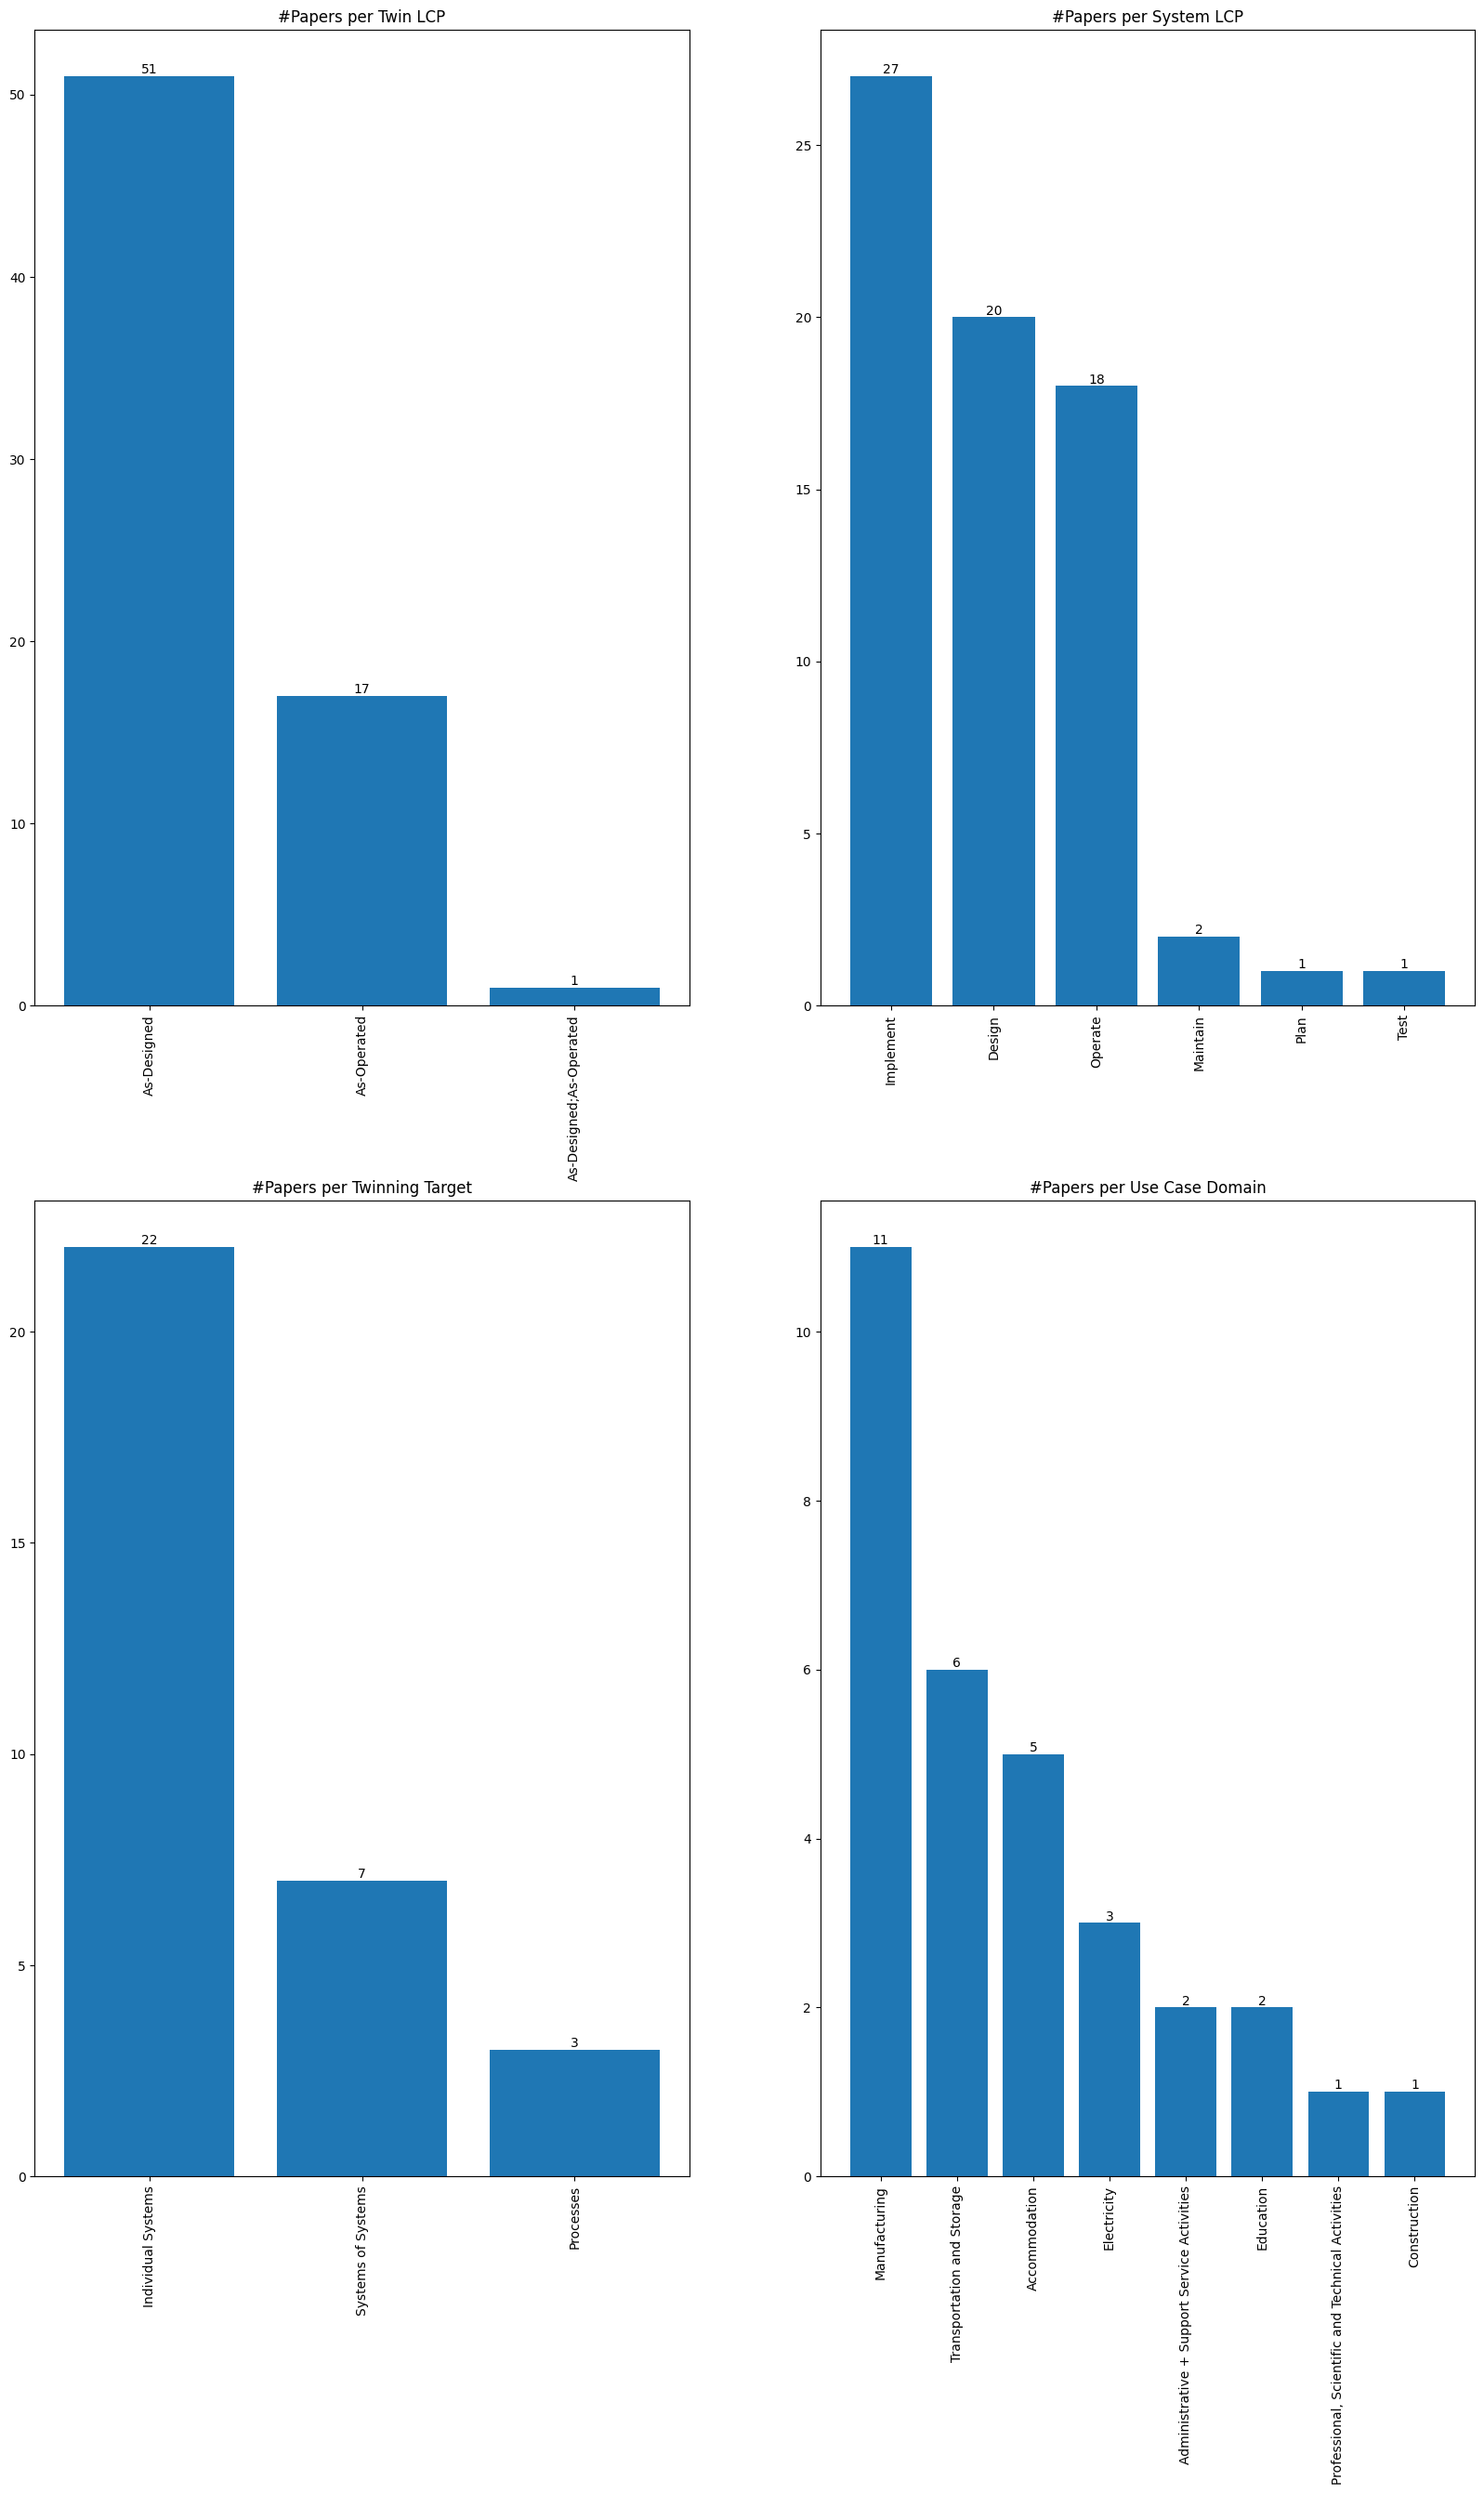

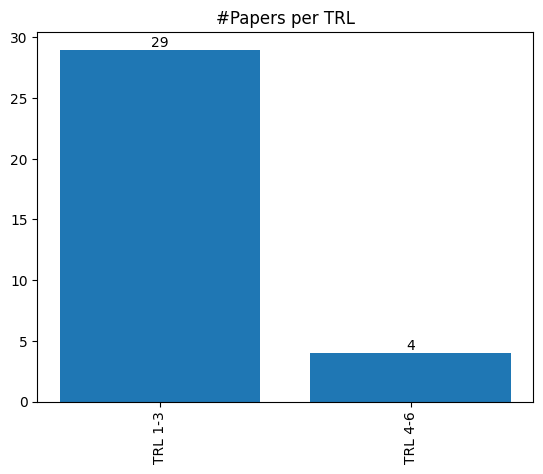

In [223]:



# Loop through the subplots and plot each bar chart
#for i, ax in enumerate(axes.flatten()):
    #if i < len(dataframes):
        #plot_data = dataframes[i]
        #ax.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
        #ax.set_title(titles[i])
        #ax.set_xticklabels(plot_data['entry'], rotation=90)
        #ax.bar_label(ax.containers[0])


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 30))
plot_data = dataframes[0]
axes[1][1].bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes[1][1].set_title(titles[0])
axes[1][1].set_xticklabels(plot_data['entry'], rotation=90)
axes[1][1].bar_label(axes[1][1].containers[0])

#
#plt.savefig("3 Paper per use case.jpg")
#fig, axes = plt.subplots()
plot_data = dataframes[1]
axes[0][1].bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes[0][1].set_title(titles[1])
axes[0][1].set_xticklabels(plot_data['entry'], rotation=90)
axes[0][1].bar_label(axes[0][1].containers[0])


#plt.savefig(destination_folder+"3 Paper per System LCP.jpg")
#fig, axes = plt.subplots()
plot_data = dataframes[2]
axes[1][0].bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes[1][0].set_title(titles[2])
axes[1][0].set_xticklabels(plot_data['entry'], rotation=90)
axes[1][0].bar_label(axes[1][0].containers[0])


#plt.savefig(destination_folder+"3 Paper per TT.jpg")
#fig, axes = plt.subplots()
plot_data = dataframes[3]
axes[0][0].bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes[0][0].set_title(titles[3])
axes[0][0].set_xticklabels(plot_data['entry'], rotation=90)
axes[0][0].bar_label(axes[0][0].containers[0])
plt.savefig(destination_folder+"3.2 Overview.jpg")

#plt.savefig(destination_folder+"3 Paper per Twin LCP.jpg")

fig, axes = plt.subplots()
plot_data = dataframes[4]
axes.bar(plot_data['entry'], plot_data['count'])  # Replace 'x' and 'y' with the appropriate column names from the DataFrame
axes.set_title(titles[4])
axes.set_xticklabels(plot_data['entry'], rotation=90)
axes.bar_label(axes.containers[0])

# Adjust the layout to avoid overlapping titles
plt.savefig(destination_folder+"3 Paper per TRL.jpg")


## Where

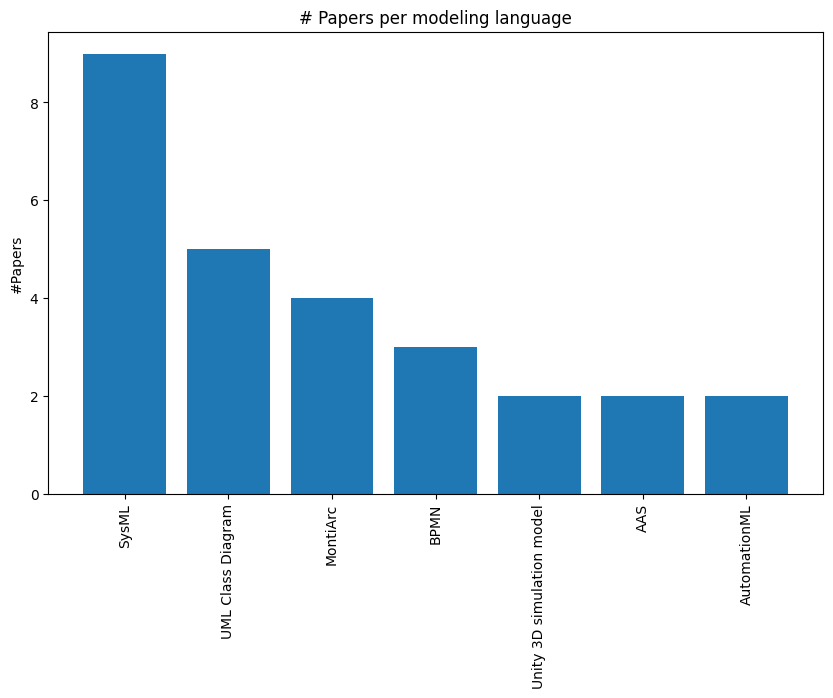

In [224]:
occurrences_df = data["modeling language"].value_counts().reset_index()
occurrences_df.columns = ['entry', 'count']
occurrences_df = occurrences_df[occurrences_df['count'] > 1]
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(occurrences_df['entry'], occurrences_df['count'])
plt.ylabel('#Papers')
plt.title('# Papers per modeling language')
plt.xticks(rotation=90)  # Rotate the x-axis labels if they are too long
plt.show()

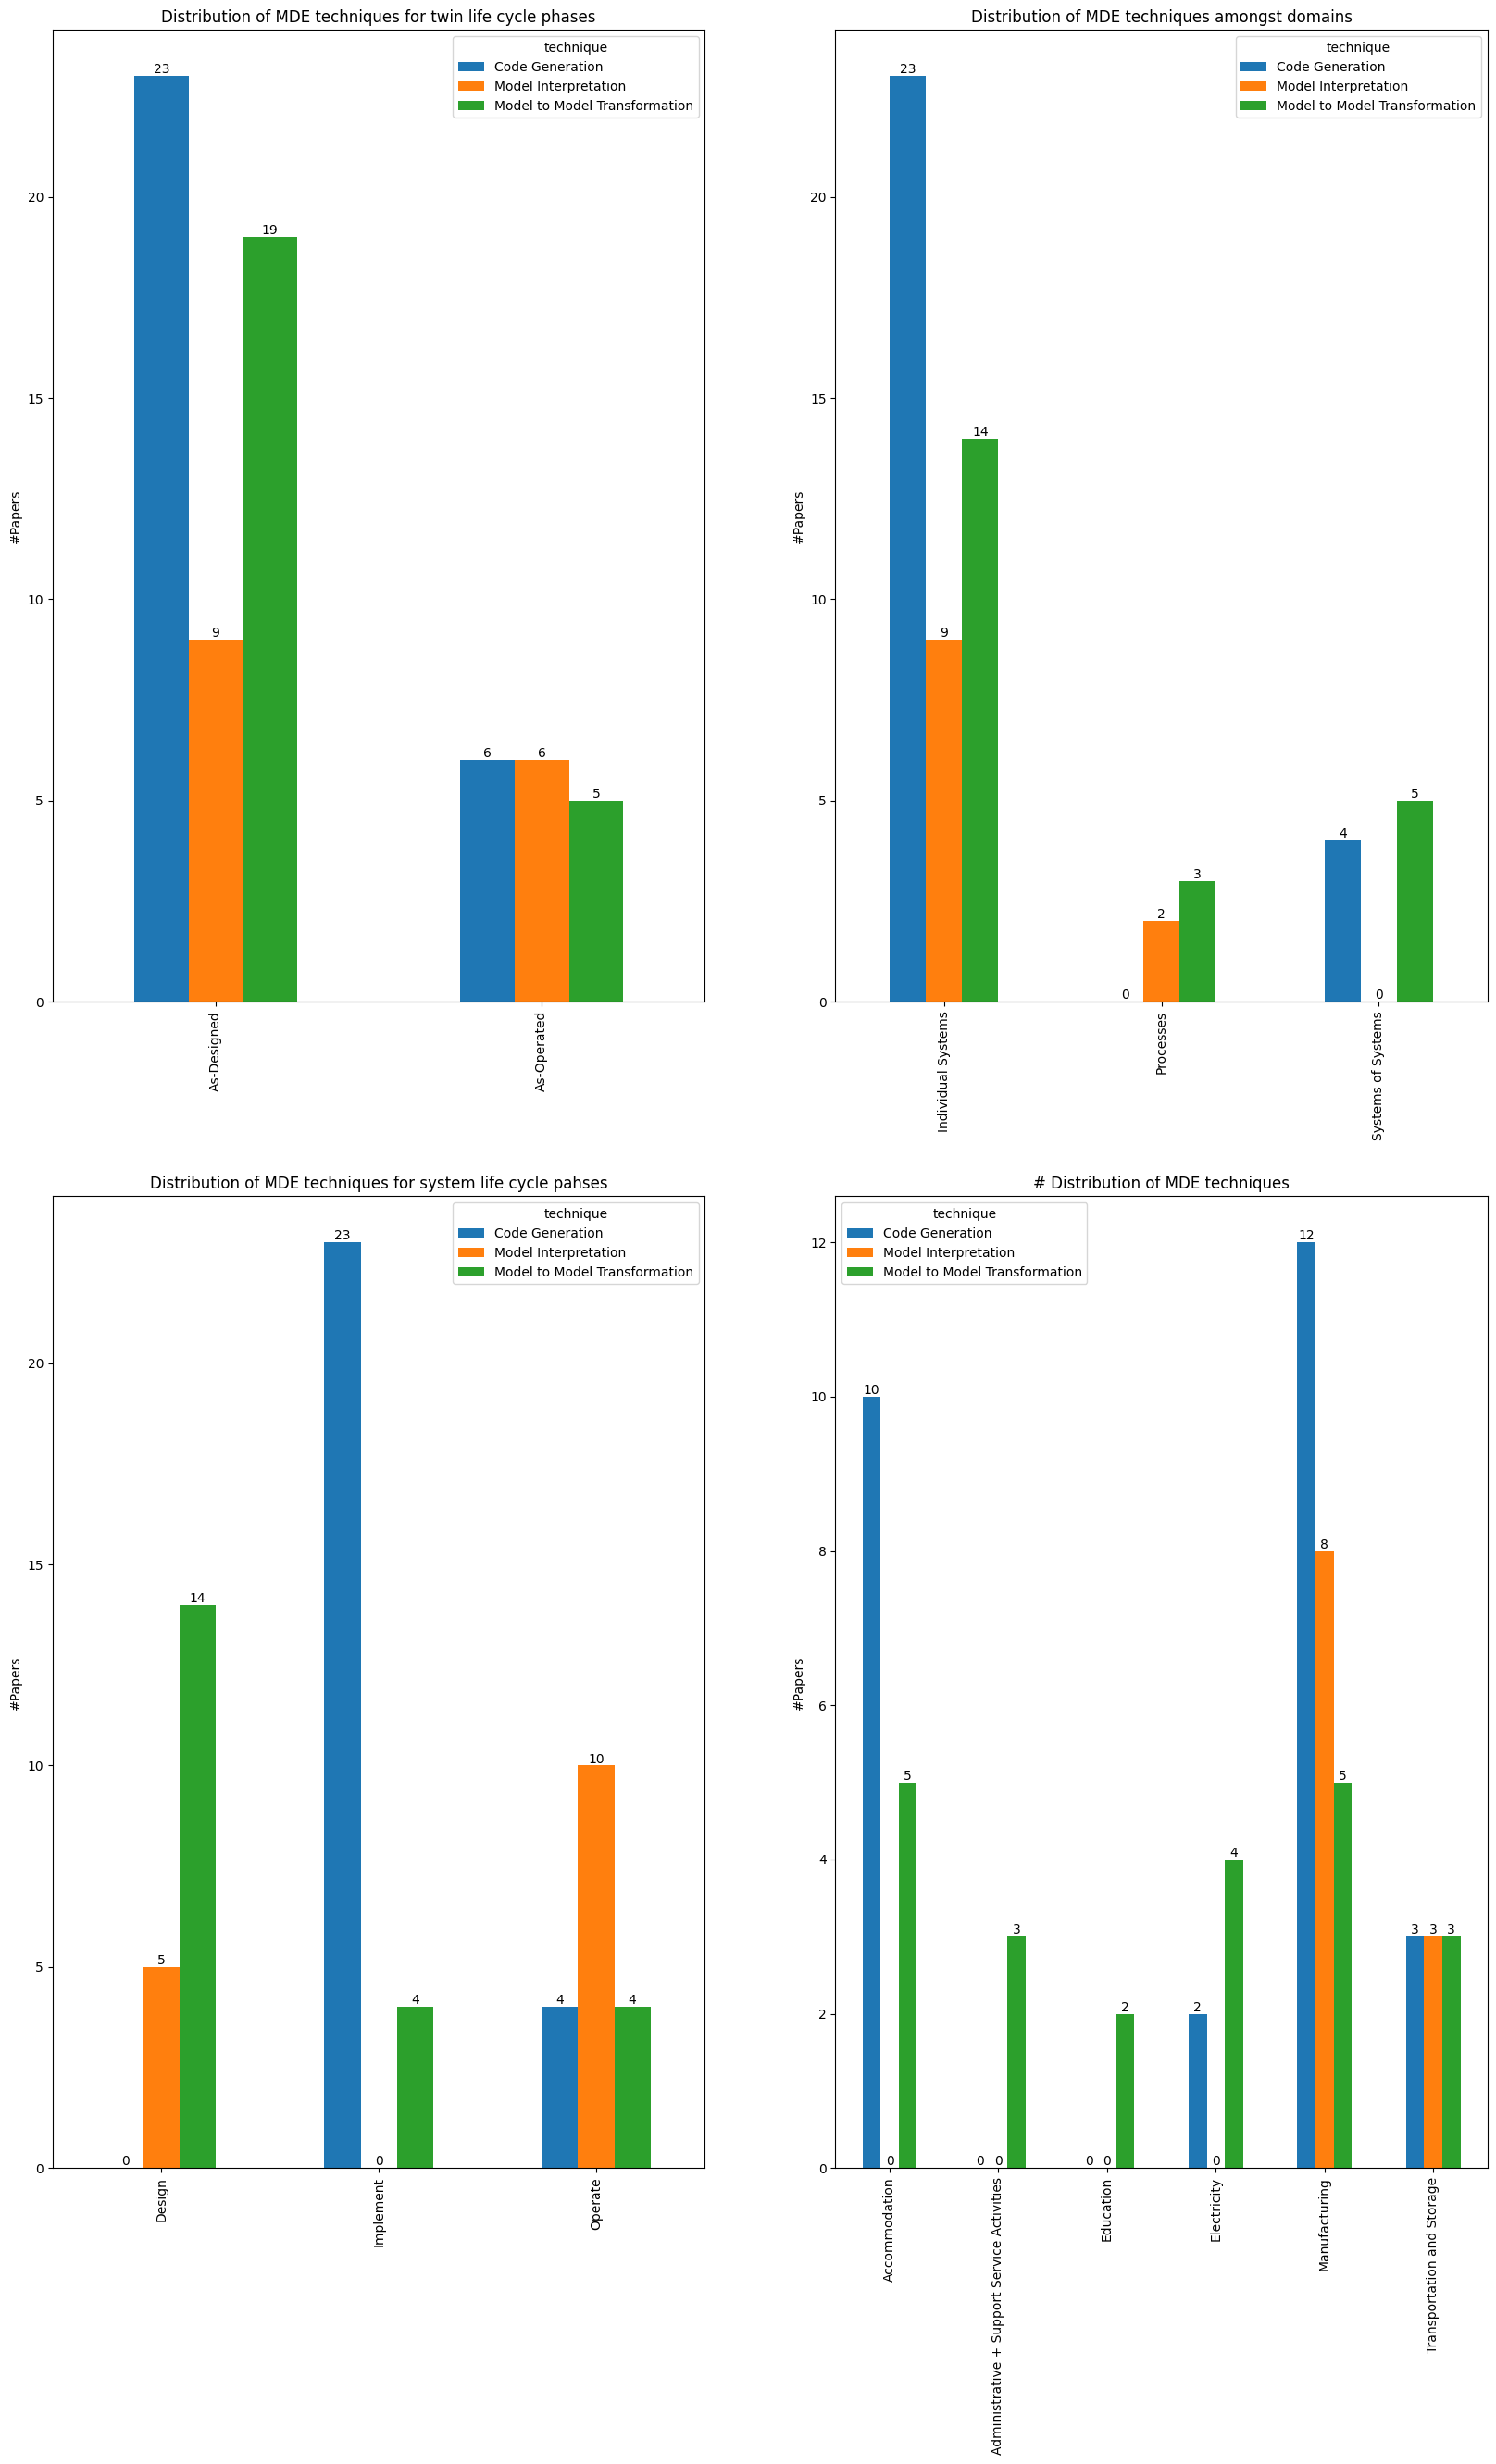

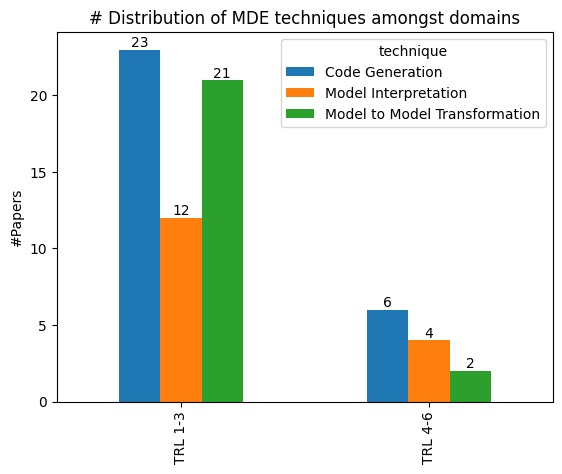

In [225]:
domains_techniques = pd.DataFrame(columns = ['value', 'technique'])
system_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twin_lcp_techniques = pd.DataFrame(columns = ['value', 'technique'])
twinning_target_techniques = pd.DataFrame(columns = ['value', 'technique'])
trl_techniques = pd.DataFrame(columns = ['value', 'technique'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]
    twinning_target = contents["twinning target"]

    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        twin_lcp1 = mdeContents["twin lifecycle phase"]
        system_lcp1 = mdeContents["system lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": domain, "technique": mdeContents["model processing technique"]}])
        domains_techniques = pd.concat([domains_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": trl, "technique": mdeContents["model processing technique"]}])
        trl_techniques = pd.concat([trl_techniques, new_line], ignore_index=True)
        new_line = pd.DataFrame([{"value": twinning_target, "technique": mdeContents["model processing technique"]}])
        twinning_target_techniques = pd.concat([twinning_target_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": twin_lcp1, "technique": mdeContents["model processing technique"]}])
        twin_lcp_techniques = pd.concat([twin_lcp_techniques, new_line], ignore_index=True)

        new_line = pd.DataFrame([{"value": system_lcp1, "technique": mdeContents["model processing technique"]}])
        system_lcp_techniques = pd.concat([system_lcp_techniques, new_line], ignore_index=True)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 30))

domains_techniques = domains_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = domains_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes[1][1], 
                                                                             ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig(destination_folder+"2.2 MDE Dom.jpg")
#fig, axes = plt.subplots()

twinning_target_techniques = twinning_target_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = twinning_target_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][1],
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques amongst domain')
#plt.savefig(destination_folder+"2.2 MDE TT.jpg")
#############################

#fig, axes = plt.subplots()
system_lcp_techniques = system_lcp_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = system_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes[1][0],
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques for system life cycle pahses", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques for system life cycle pahses')
#plt.savefig(destination_folder+"2.2 MDE SLCP.jpg")

#fig, axes = plt.subplots()
twin_lcp_techniques = twin_lcp_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = twin_lcp_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][0],
                                                                                     ylabel="#Papers", title="Distribution of MDE techniques for twin life cycle phases", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.title('# Distribution of MDE techniques')

plt.savefig(destination_folder+"2.2 Overviwe.jpg")


fig, axes = plt.subplots()

trl_techniques = trl_techniques.groupby(['value','technique']).filter(lambda x : len(x) > 1)
ax = trl_techniques.groupby(['value','technique']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                         ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
plt.title('# Distribution of MDE techniques amongst domains')
for container in ax.containers:
    ax.bar_label(container)
plt.savefig(destination_folder+"2.2 MDE TRL.jpg")

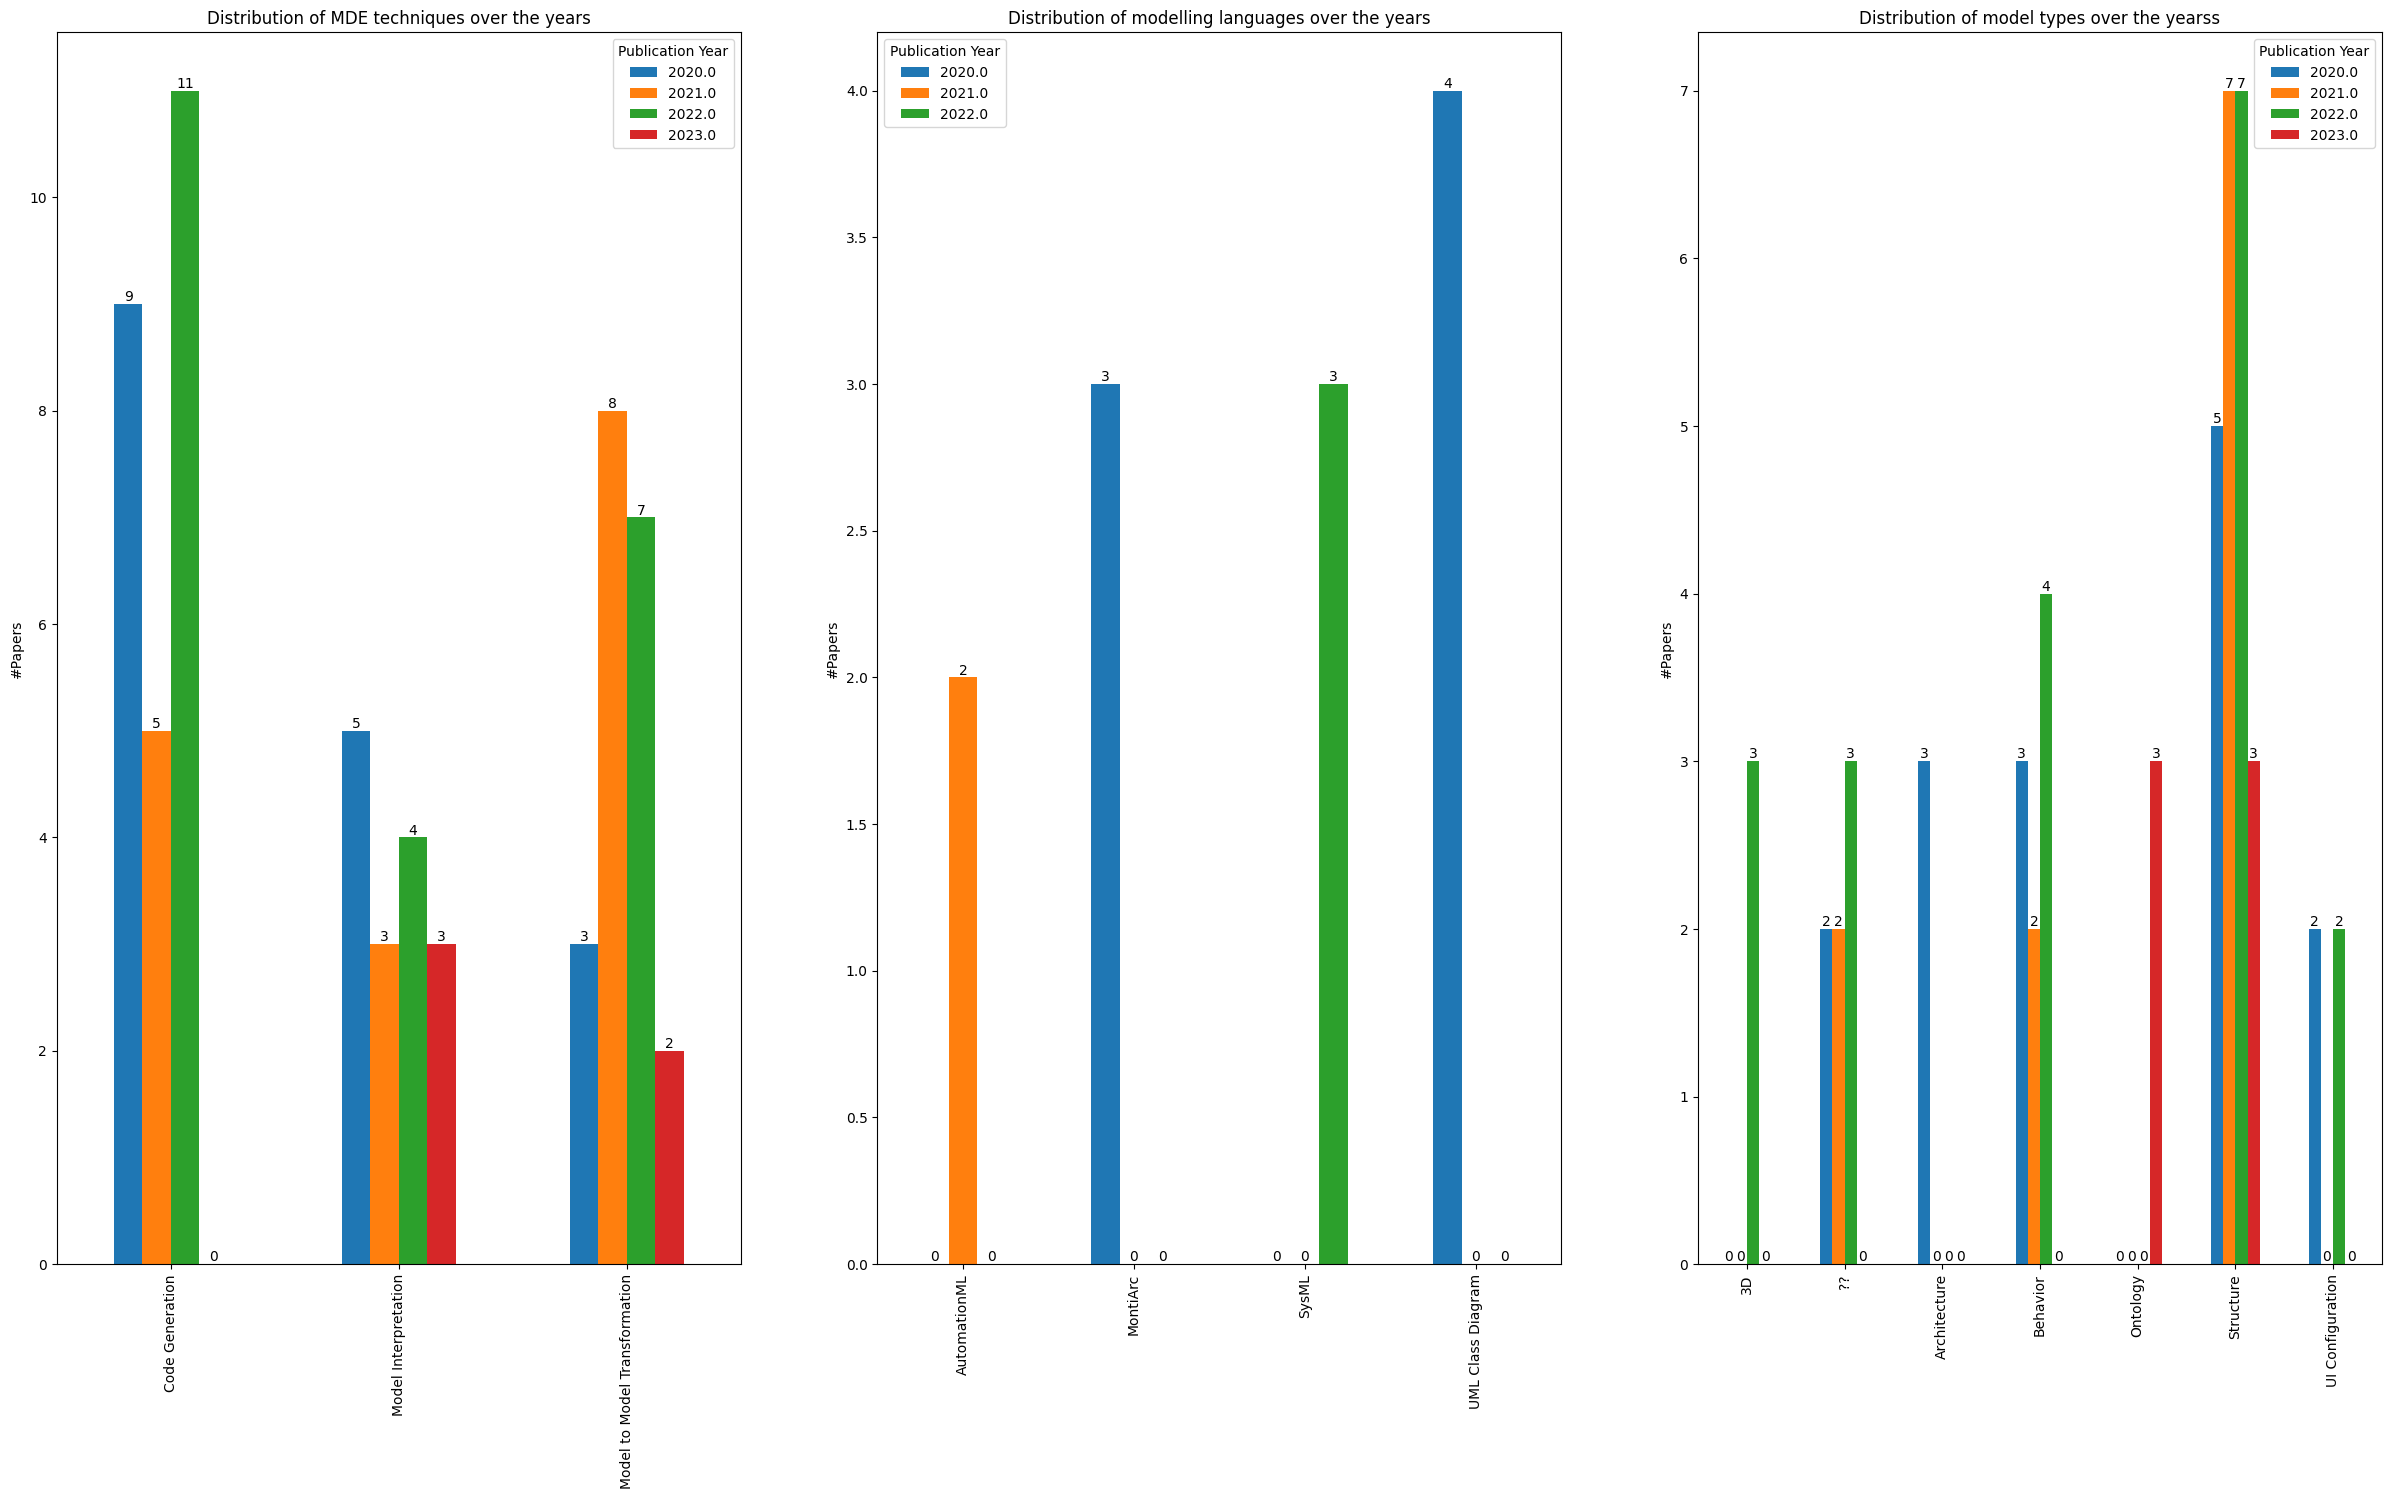

In [226]:
model_processing_techniques = pd.DataFrame(columns = ['value', 'Publication Year'])
year_model_type = pd.DataFrame(columns = ['value', 'Publication Year'])
model_language = pd.DataFrame(columns = ['value', 'Publication Year'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    lang = contents["modeling language"]
    try:
        year = contents['Publication Year']

        for item in lang:
            new_line = pd.DataFrame([{"value": item, 'Publication Year': year}])
            model_language = pd.concat([model_language, new_line], ignore_index=True)

        for index, mdeContents in contents["modelTrafos"].items():
            mdeContents = json.loads(mdeContents)
            new_line = pd.DataFrame([{"value": mdeContents['model processing technique'], 'Publication Year': year}])
            model_processing_techniques = pd.concat([model_processing_techniques, new_line], ignore_index=True)
            
            new_line = pd.DataFrame([{"value": mdeContents['model type'], 'Publication Year': year}])
            year_model_type = pd.concat([year_model_type, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 16))


model_processing_techniques = model_processing_techniques.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
ax = model_processing_techniques.groupby(['value','Publication Year']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0], 
                                                                             ylabel="#Papers", title="Distribution of MDE techniques over the years", xlabel="")

label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of MDE techniques over the years')

model_language = model_language.groupby(['value','Publication Year'])
model_language = model_language.filter(lambda x : len(x) > 1).groupby(['value','Publication Year'])
ax = model_language.size().unstack().plot(kind='bar', stacked=False, ax=axes[1],
                                                                         ylabel="#Papers", title="Distribution of modelling languages over the years", xlabel="")

for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of modelling languages over the years')

year_model_type = year_model_type.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
ax = year_model_type.groupby(['value','Publication Year']).size().unstack().plot(kind='bar', stacked=False, ax=axes[2],
                                                                                     ylabel="#Papers", title="Distribution of model types over the yearss", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
#plt.title('Distribution over the years')


plt.savefig(destination_folder+"where_detailed2.jpg")
    

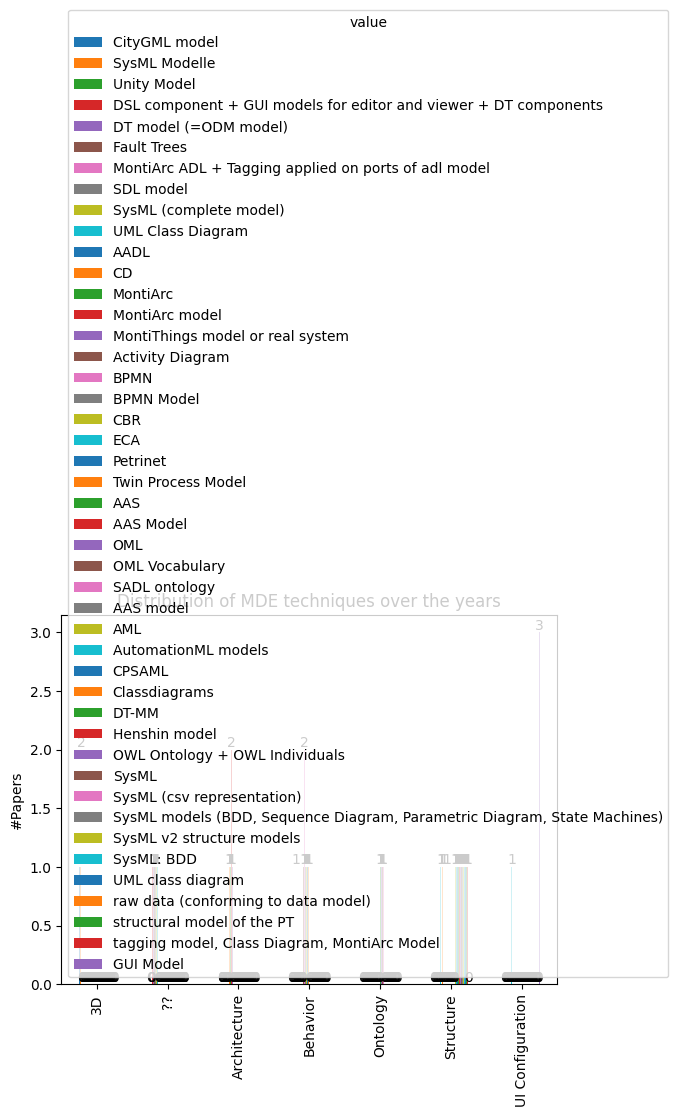

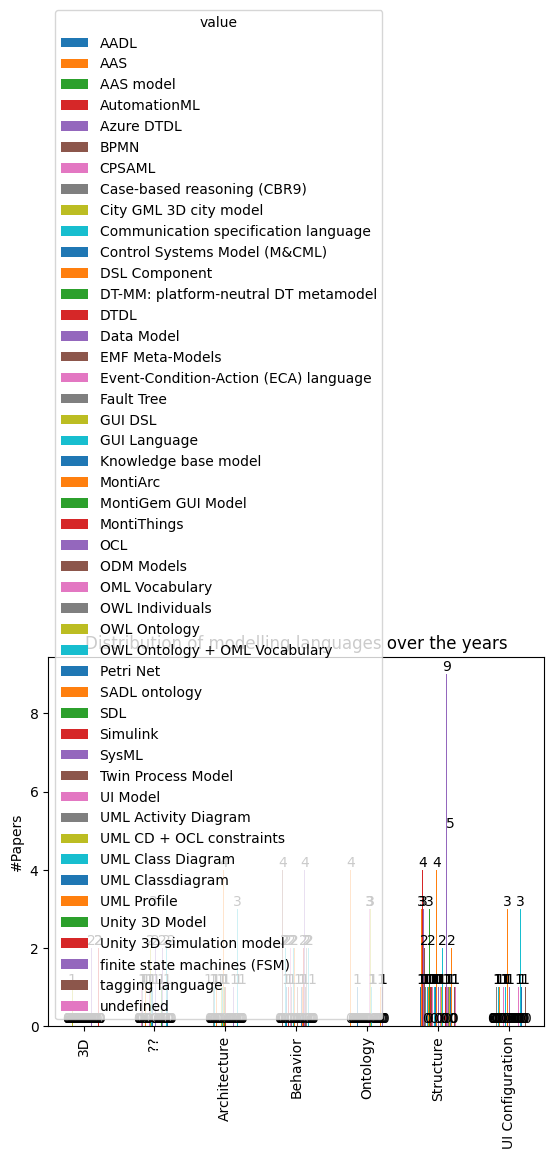

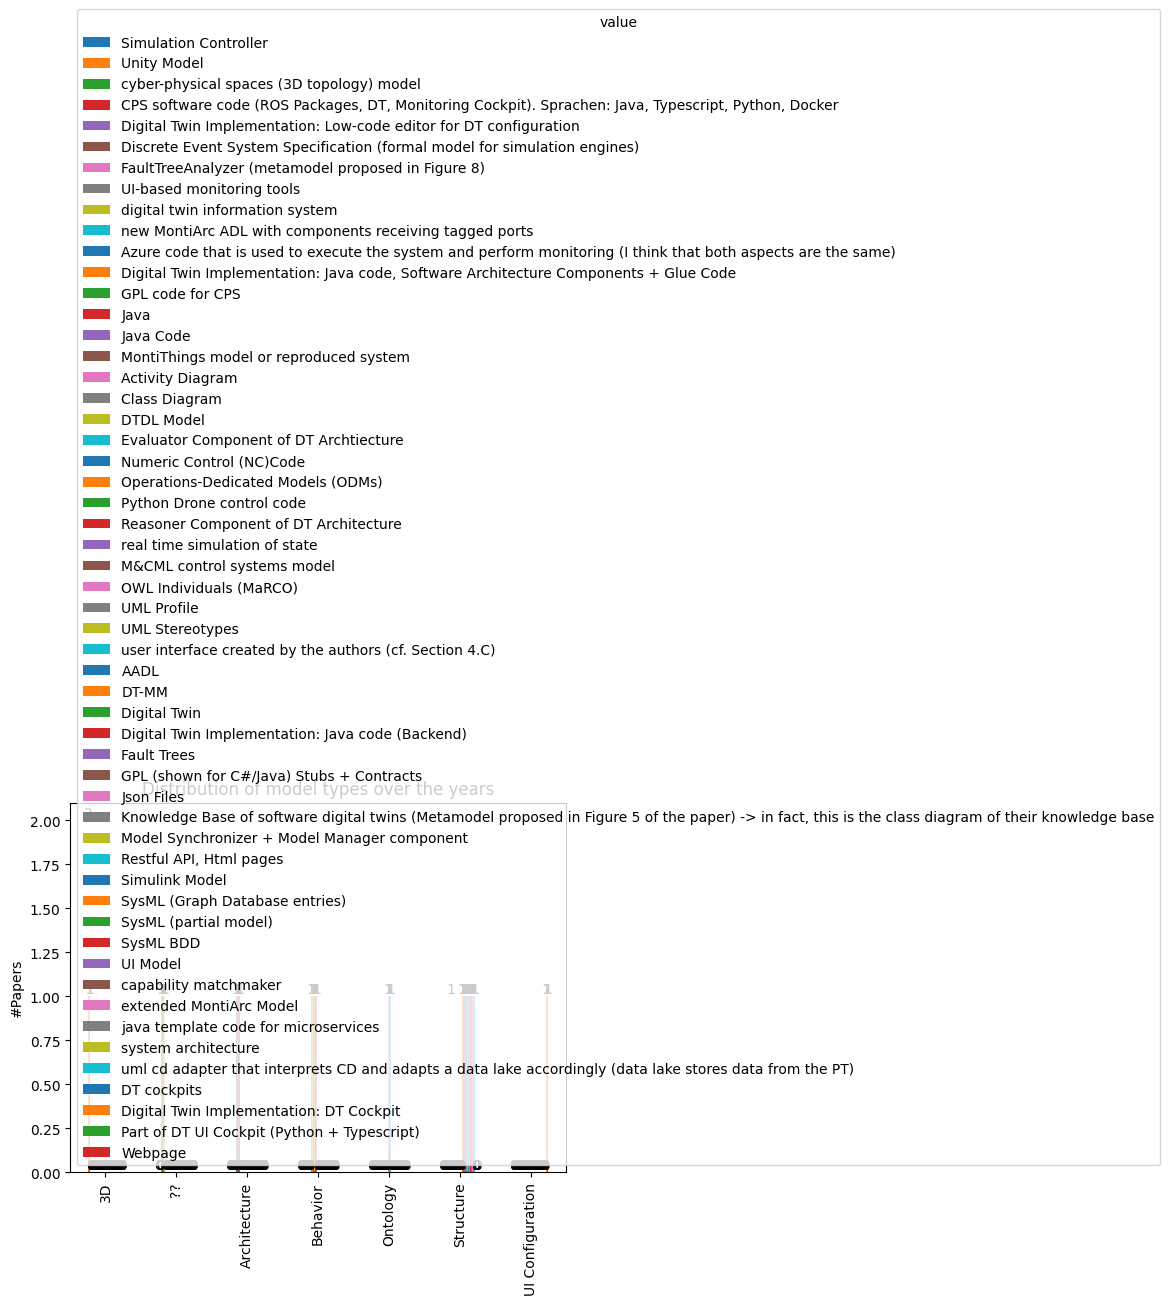

In [227]:
source_type = pd.DataFrame(columns = ['value', 'model type'])
target_type = pd.DataFrame(columns = ['value', 'model type'])
lang_type = pd.DataFrame(columns = ['value', 'model type'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    lang = contents["modeling language"]
    try:

        

        for index, mdeContents in contents["modelTrafos"].items():
            
            mdeContents = json.loads(mdeContents)
            modeltype1 = mdeContents['model type']

            for item in lang:
                new_line = pd.DataFrame([{"value": item, 'model type': modeltype1}])
                lang_type = pd.concat([lang_type, new_line], ignore_index=True)

            new_line = pd.DataFrame([{"value": mdeContents['source'], 'model type': modeltype1}])
            source_type = pd.concat([source_type, new_line], ignore_index=True)
            
            new_line = pd.DataFrame([{"value": mdeContents['target'], 'model type': modeltype1}])
            target_type = pd.concat([target_type, new_line], ignore_index=True)
    except KeyError as err:
        continue

fig, axes = plt.subplots()


source_type = source_type#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
ax = source_type.groupby(['model type','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes, 
                                                                             ylabel="#Papers", title="Distribution of MDE techniques over the years", xlabel="")
plt.title('Distribution of MDE techniques over the years')
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)

fig, axes = plt.subplots()
lang_type = lang_type.groupby(['model type','value'])
lang_type = lang_type#.filter(lambda x : len(x) > 1).groupby(['value','Publication Year'])
ax = lang_type.size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                         ylabel="#Papers", title="Distribution of MDE techniques amongst domains", xlabel="")
plt.title('Distribution of modelling languages over the years')
for container in ax.containers:
    ax.bar_label(container)

fig, axes = plt.subplots()
target_type = target_type#.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
ax = target_type.groupby(['model type','value']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="Distribution of model types over the years", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.title('Distribution of model types over the years')


plt.savefig(destination_folder+"where_detailed3.jpg")
    

# 3.1.3 Over the years

In [228]:
source_year = pd.DataFrame(columns = ['value', 'Publication Year'])
target_year = pd.DataFrame(columns = ['value', 'Publication Year'])
model_language = pd.DataFrame(columns = ['value', 'Publication Year'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)
    
#print(data_semistr)
years = data["Publication Year"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    lang = contents["modeling language"]
    try:
        year = contents['Publication Year']

        for item in lang:
            new_line = pd.DataFrame([{"value": item, 'Publication Year': year}])
            model_language = pd.concat([model_language, new_line], ignore_index=True)

        for index, mdeContents in contents["modelTrafos"].items():
            mdeContents = json.loads(mdeContents)
            new_line = pd.DataFrame([{"value": mdeContents['model processing technique'], 'Publication Year': year}])
            source_year = pd.concat([source_year, new_line], ignore_index=True)
            
            new_line = pd.DataFrame([{"value": mdeContents['model type'], 'Publication Year': year}])
            target_year = pd.concat([target_year, new_line], ignore_index=True)
    except KeyError as err:
        continue

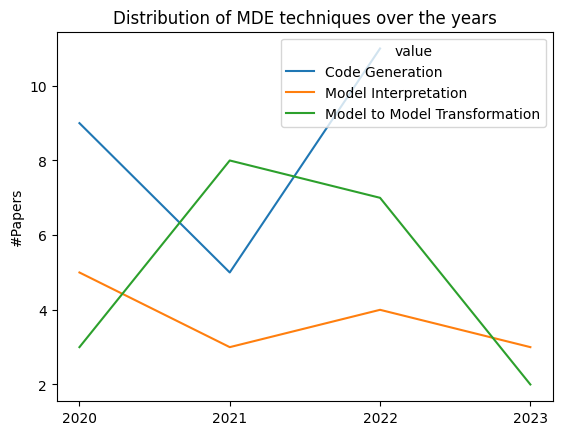

In [229]:
from matplotlib.ticker import MaxNLocator
fig, axes = plt.subplots()


source_year = source_year.groupby(['value','Publication Year']).filter(lambda x : len(x) > 1)
ax = source_year.groupby(['Publication Year','value']).size().unstack().plot(kind='line', stacked=False, ax=axes, 
                                                                             ylabel="#Papers", title="Distribution of MDE techniques over the years", xlabel="")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Distribution of MDE techniques over the years')
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)

plt.savefig(destination_folder+"mdeOverYears.jpg")

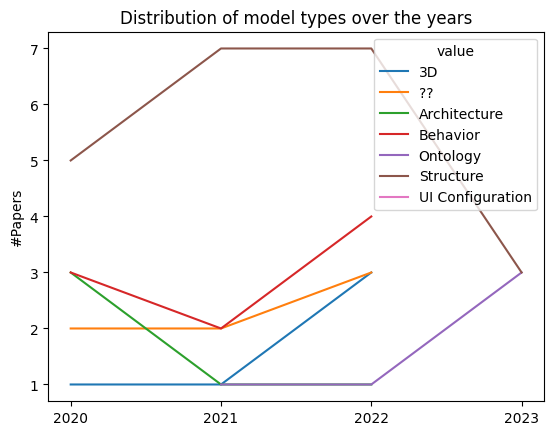

In [230]:
fig, axes = plt.subplots()
#target_year = target_year#.groupby(['value','Publication Year'])#.filter(lambda x : len(x) > 1)
ax = target_year.groupby(['Publication Year','value']).size().unstack().plot(kind='line', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="Distribution of model types over the years", xlabel="")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
for container in ax.containers:
    ax.bar_label(container)

plt.savefig(destination_folder+"mdeOverYears2.jpg")

# Maturity

In [231]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]

    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    for item in lang:
            new_line = pd.DataFrame([{"value": item, 'trl': trl}])
            modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = mdeContents["twin lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)



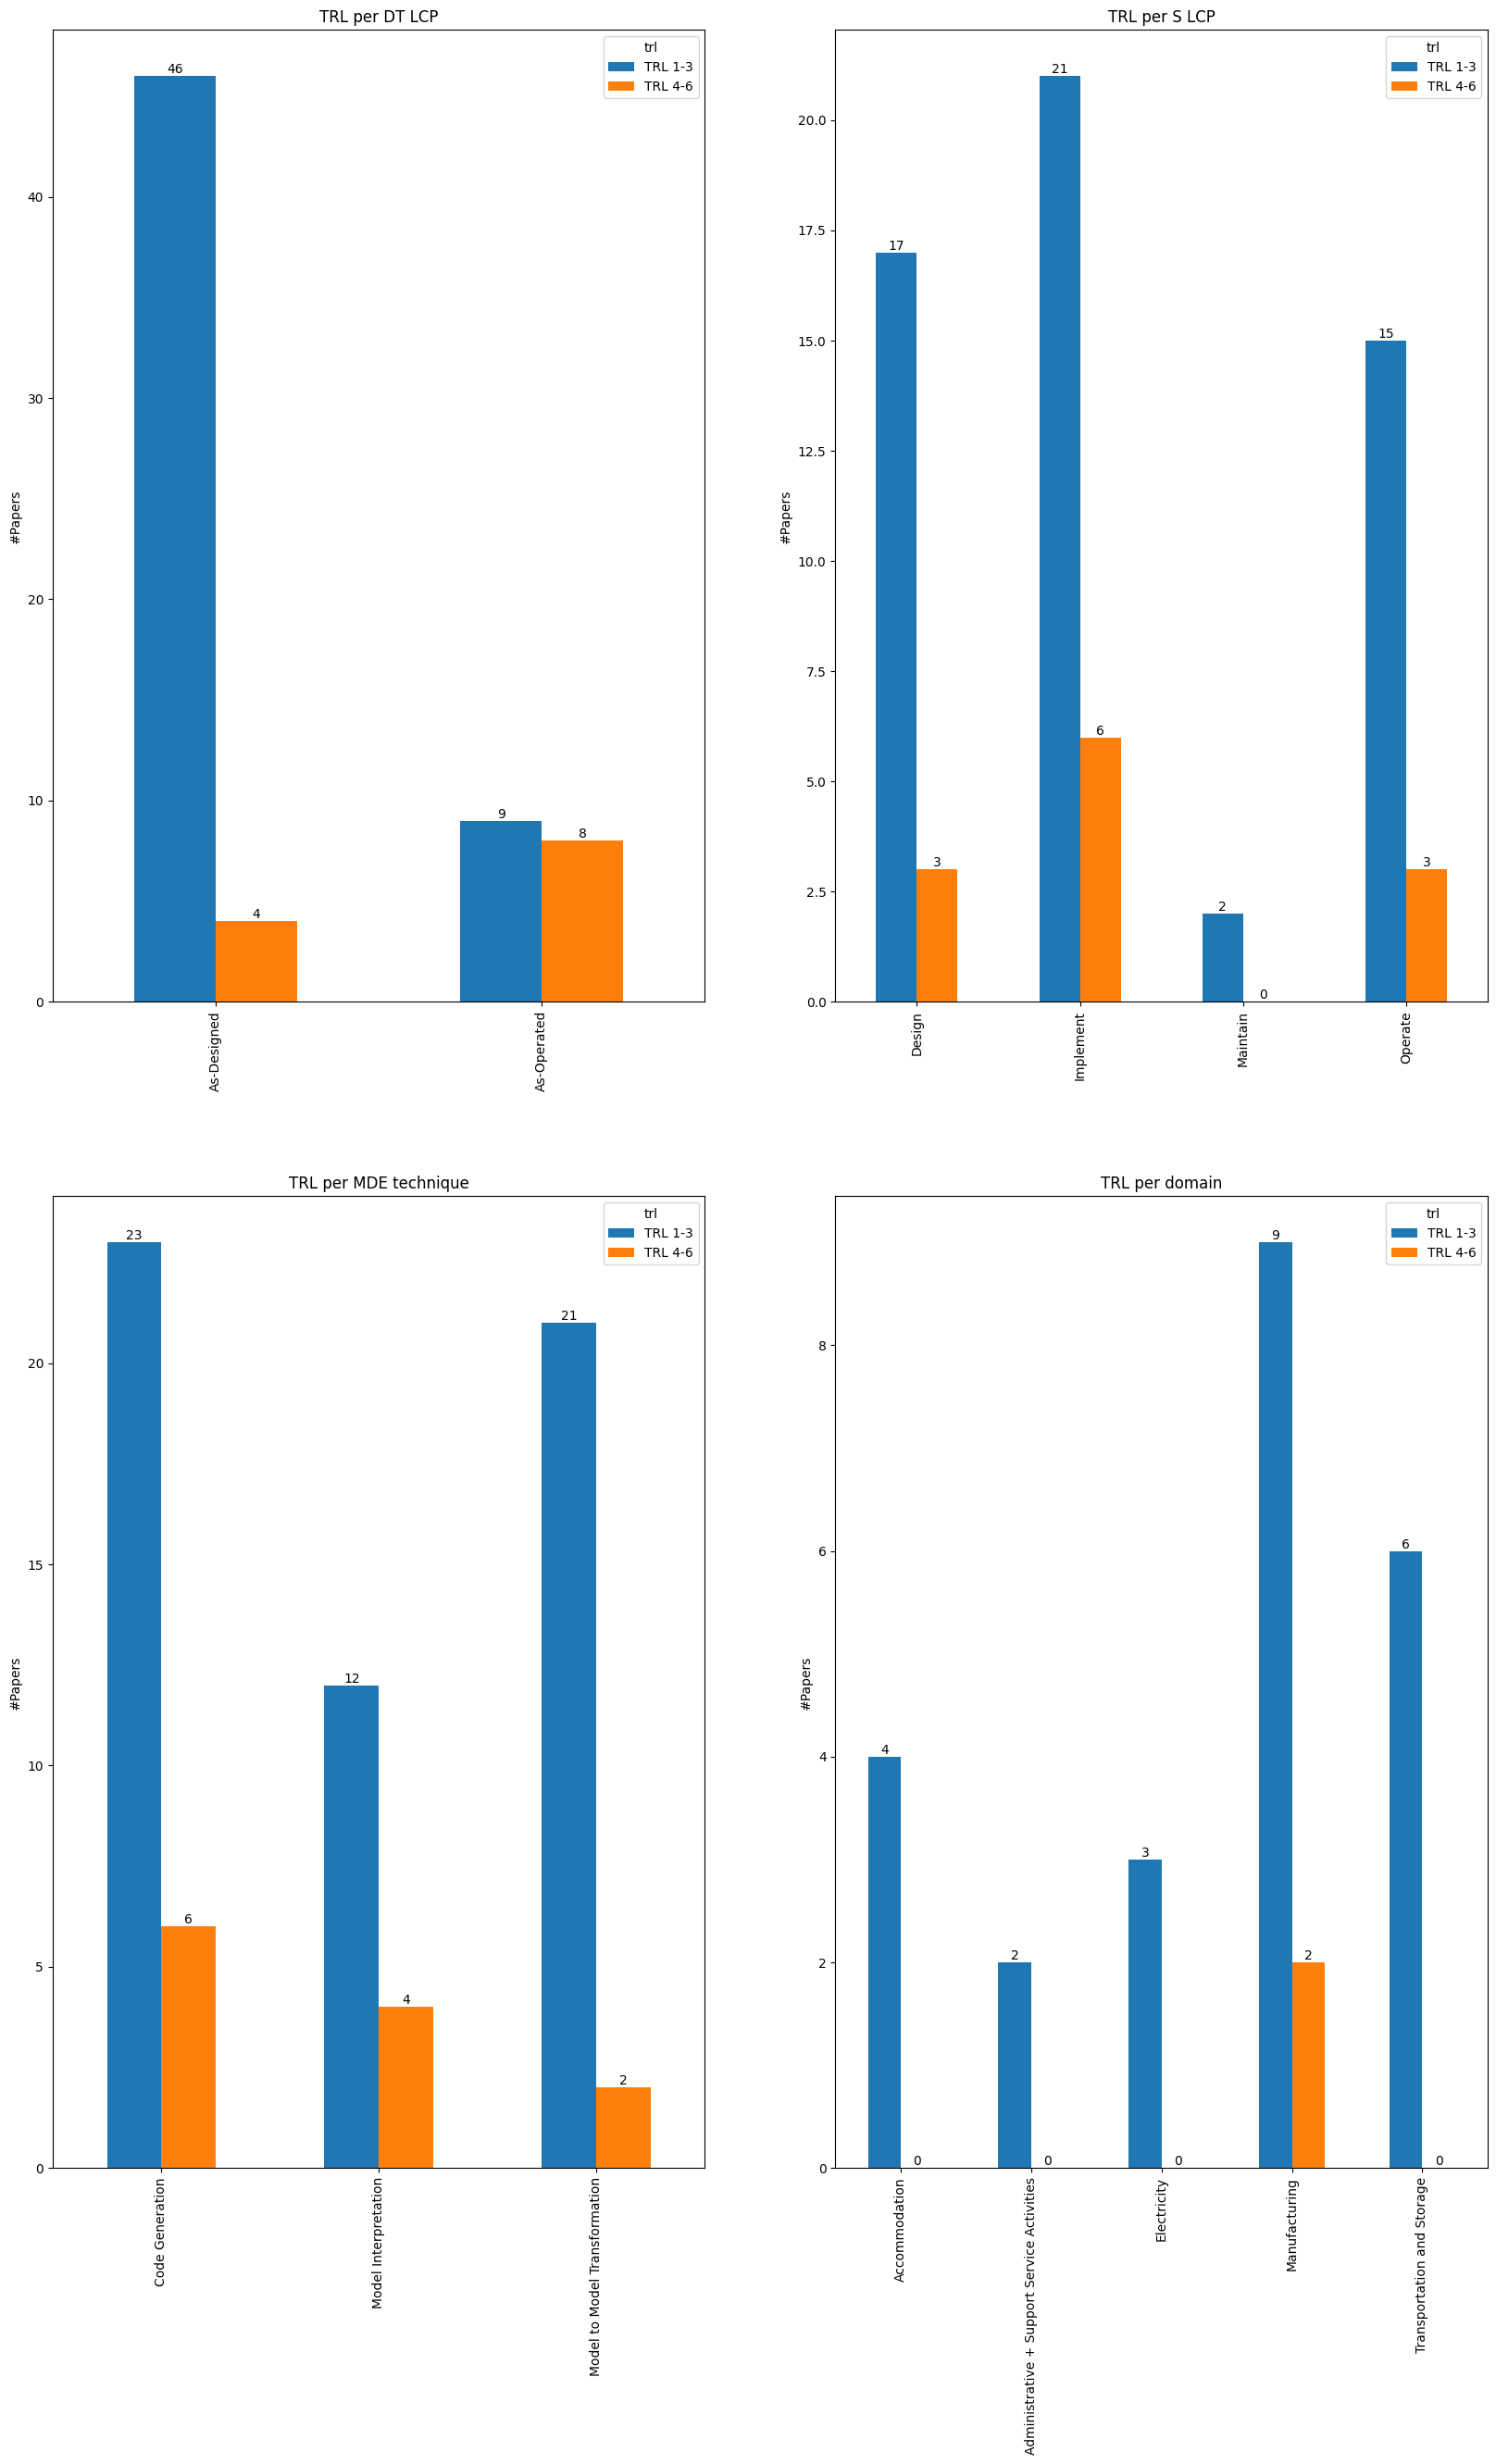

In [232]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 30))

domain_trl = domain_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = domain_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[1][1], 
                                                                             ylabel="#Papers", title="TRL per domain", xlabel="")
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
#plt.savefig(destination_folder+"2.2 MDE Dom.jpg")
#fig, axes = plt.subplots()

#modlang_trl = modlang_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
#ax = modlang_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][1],
                                                                                     #ylabel="#Papers", title="TRL per modelling language", xlabel="")

slcp_trl = slcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = slcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][1],
                                                                         ylabel="#Papers", title="TRL per S LCP", xlabel="")

for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques amongst domain')
#plt.savefig(destination_folder+"2.2 MDE TT.jpg")
#############################

#fig, axes = plt.subplots()
mde_trl = mde_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = mde_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[1][0],
                                                                                     ylabel="#Papers", title="TRL per MDE technique", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques for system life cycle pahses')
#plt.savefig(destination_folder+"2.2 MDE SLCP.jpg")

#fig, axes = plt.subplots()
tlcp_trl = tlcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = tlcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes[0][0],
                                                                                     ylabel="#Papers", title="TRL per DT LCP", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
#plt.title('# Distribution of MDE techniques')

plt.savefig(destination_folder+"3.3.1 Overview.jpg")


In [233]:
modlang_trl = pd.DataFrame(columns = ['value', 'trl'])
mde_trl = pd.DataFrame(columns = ['value', 'trl'])
domain_trl = pd.DataFrame(columns = ['value', 'trl'])
slcp_trl = pd.DataFrame(columns = ['value', 'trl'])
tlcp_trl = pd.DataFrame(columns = ['value', 'trl'])

with open("target/json/data_consolidated_semistructured__1.json", 'r') as json_file:
    data_semistr = json.load(json_file)

#add syslifecycle and twin lifecycle
# in one graphic
mde_techniques = data["model processing technique"].value_counts().index.tolist()
for title, contents in data_semistr.items():
    domain = contents["use case domain"]
    trl = contents["Technological Readiness Level"]

    new_line = pd.DataFrame([{"value": domain, 'trl': trl}])
    domain_trl = pd.concat([domain_trl, new_line], ignore_index=True)

    for item in lang:
            new_line = pd.DataFrame([{"value": item, 'trl': trl}])
            modlang_trl = pd.concat([modlang_trl, new_line], ignore_index=True)
    
    for index, mdeContents in contents["modelTrafos"].items():

        mdeContents = json.loads(mdeContents)
        mdeTech = mdeContents["model processing technique"]
        system_lcp1 = mdeContents["system lifecycle phase"]
        tlcp_1 = mdeContents["twin lifecycle phase"]

        
        new_line = pd.DataFrame([{"value": mdeTech, "trl": trl}])
        mde_trl = pd.concat([mde_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": tlcp_1, "trl": trl}])
        tlcp_trl = pd.concat([tlcp_trl, new_line], ignore_index=True)
        
        new_line = pd.DataFrame([{"value": system_lcp1, "trl": trl}])
        slcp_trl = pd.concat([slcp_trl, new_line], ignore_index=True)

TypeError: 'Axes' object is not subscriptable

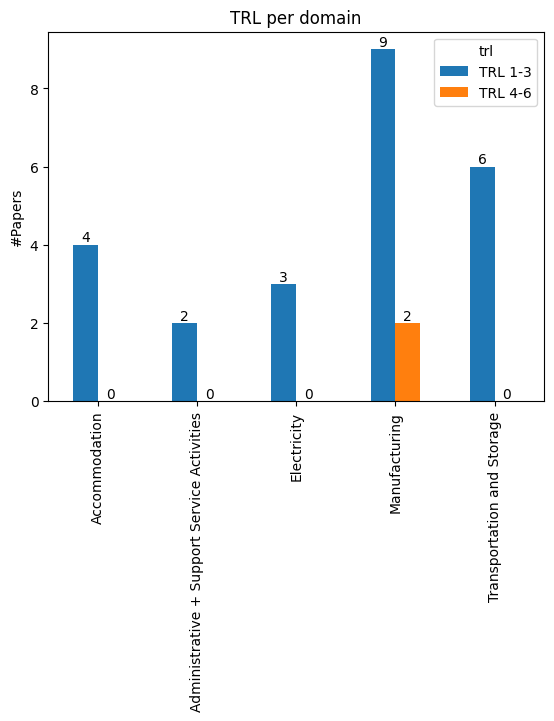

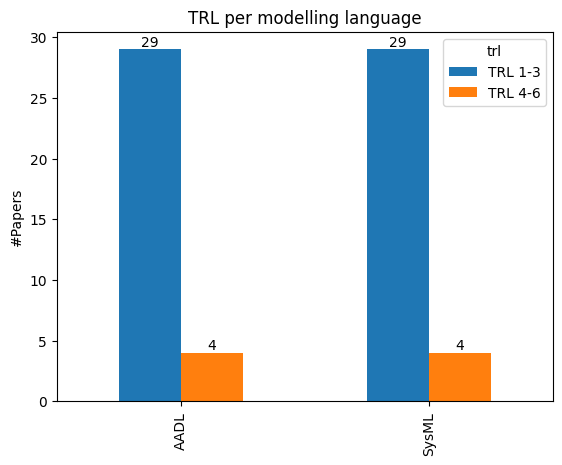

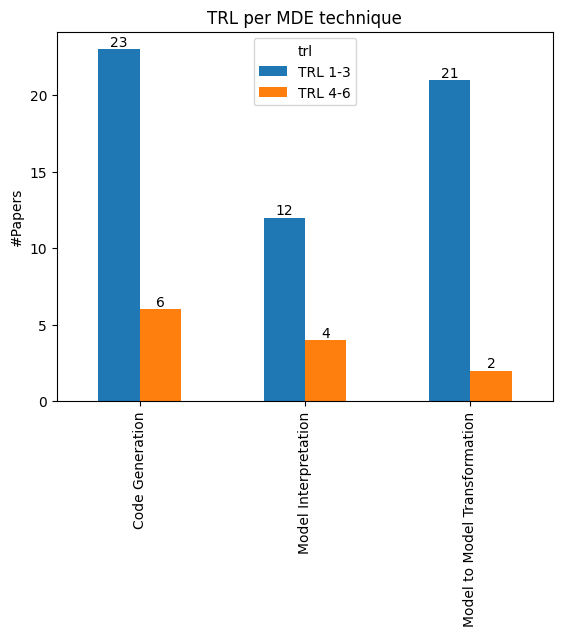

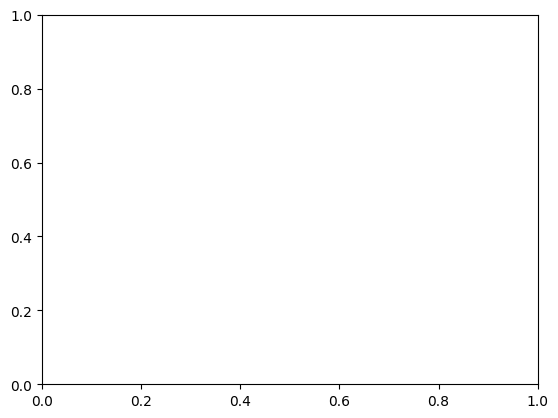

In [234]:
fig, axes = plt.subplots()

domain_trl = domain_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = domain_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes, 
                                                                             ylabel="#Papers", title="TRL per domain", xlabel="")
label_pre = 0
for container in ax.containers:
    ax.bar_label(container)
plt.savefig(destination_folder+"3.3.1 Domain TRL.jpg")

#############################

fig, axes = plt.subplots()

modlang_trl = modlang_trl#.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = modlang_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="TRL per modelling language", xlabel="")
for container in ax.containers:
    ax.bar_label(container)

plt.savefig(destination_folder+"3.3.1 Modelling Lang TRL.jpg")

#############################

fig, axes = plt.subplots()
mde_trl = mde_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = mde_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="TRL per MDE technique", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.savefig(destination_folder+"3.3.1 MDE TRL.jpg")

#############################

fig, axes = plt.subplots()
tlcp_trl = tlcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = tlcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                                     ylabel="#Papers", title="TRL per DT LCP", xlabel="")
for container in ax.containers:
    ax.bar_label(container)
plt.savefig(destination_folder+"3.3.1 tlcp TRL.jpg")

#############################

fig, axes = plt.subplots()
slcp_trl = slcp_trl.groupby(['value','trl']).filter(lambda x : len(x) > 1)
ax = slcp_trl.groupby(['value','trl']).size().unstack().plot(kind='bar', stacked=False, ax=axes,
                                                                         ylabel="#Papers", title="TRL per S LCP", xlabel="")
#plt.title('# Distribution of MDE techniques amongst domains')
for container in ax.containers:
    ax.bar_label(container)
plt.savefig(destination_folder+"3.3.1 sclp TRL.jpg")

TODO: Design/Etc

Modeling Languages ist 1.1
MDE techniques ist 1.2
MDE techniques over time ist 1.3
MDE techniques detailed ist 2.2
Maturity ist 3
